In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D  

In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
hgtnpy = np.load('./data/source_data/PV_hgt_data_DJF_256.npy', mmap_mode='r')

FileNotFoundError: [Errno 2] No such file or directory: './data/source_data/PV_hgt_data_DJF_256.npy'

In [4]:
pvnpy = np.load('./data/source_data/PV_pv_data_DJF_256.npy', mmap_mode='r')

In [16]:
mask = np.load('./data/source_data/mask_256.npy')

In [17]:
mask = mask.astype(bool)

In [5]:
hgtnpy.shape

(21476, 256, 256)

In [6]:
Ntotal = hgtnpy.shape[0]

In [7]:
Ntotal

21476

In [8]:
idx = np.random.randint(0, hgtnpy.shape[0])

In [9]:
ch_hgt = hgtnpy[idx]
ch_pv = pvnpy[idx]

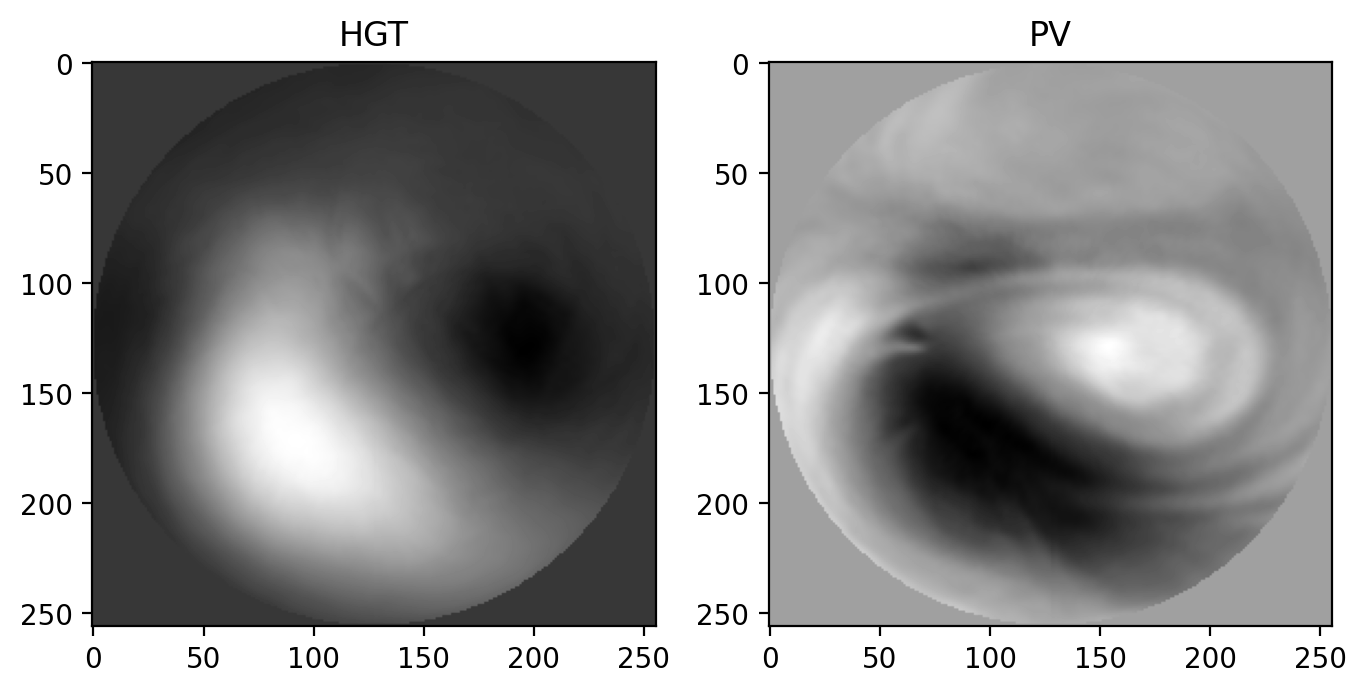

In [10]:
f = plt.figure(figsize=(8,4), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(ch_hgt, cmap='gray')
plt.title('HGT')
p = plt.subplot(1,2,2)
plt.imshow(ch_pv, cmap='gray')
plt.title('PV');

In [11]:
xx,yy = np.meshgrid(np.arange(0, 256), np.arange(0, 256))

Text(0.5, 0, 'HGT')

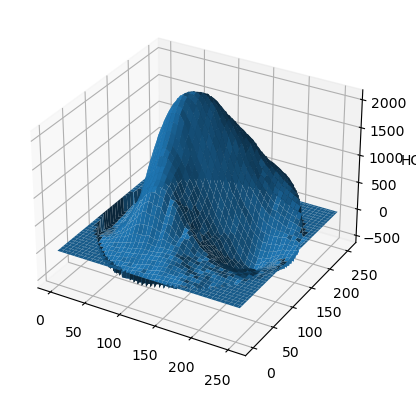

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, ch_hgt)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
ax.set_zlabel('HGT')

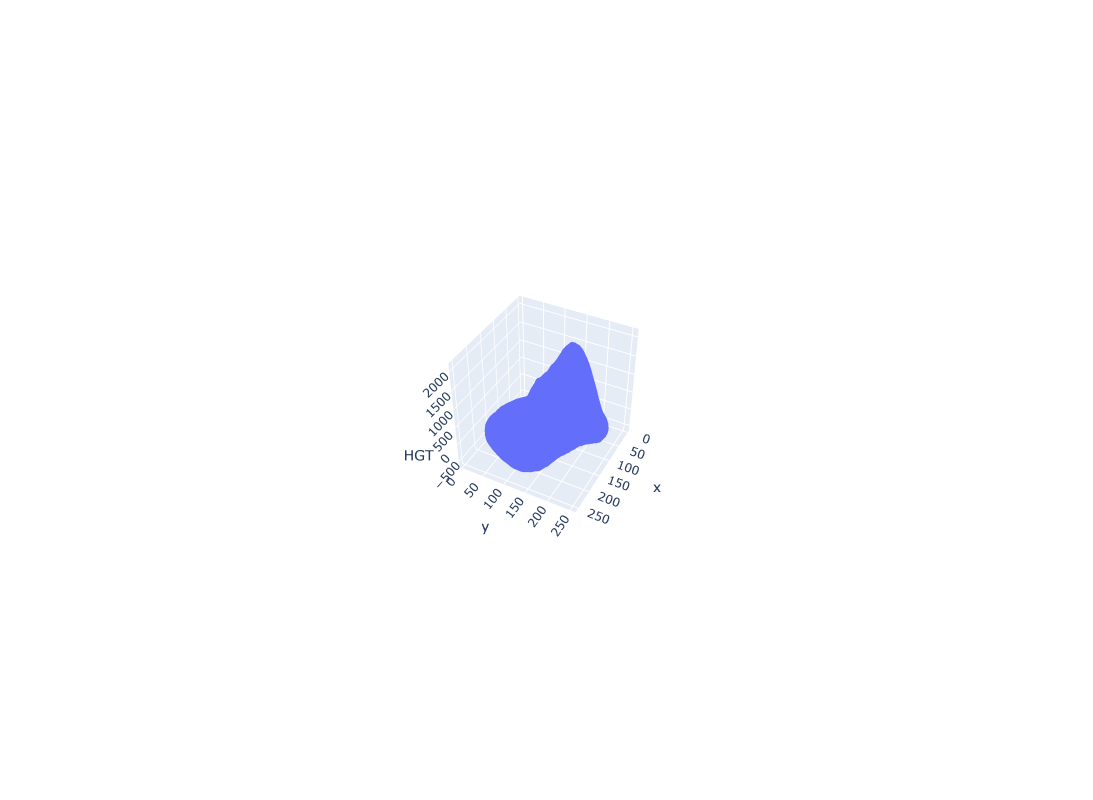

In [18]:
fig = go.Figure(data=[go.Scatter3d(x=xx[mask].ravel(),
                                   y=yy[mask].ravel(),
                                   z=ch_hgt[mask].ravel(),
                                   mode='markers',
                                   marker=dict(size=1))
                     ])
fig.update_layout(autosize=False,
                  width=800,
                  height=800,
                  margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
                  scene = dict(xaxis_title='x',
                               yaxis_title='y',
                               zaxis_title='HGT'))
fig.show()

In [25]:
sample_indices = np.random.choice(np.arange(0, hgtnpy.shape[0]), 5000, replace=False)

In [26]:
hgt_subsample = hgtnpy[sample_indices]
hgt_subsample_mean = hgt_subsample.mean(axis=0)

In [27]:
pv_subsample = pvnpy[sample_indices]
pv_subsample_mean = pv_subsample.mean(axis=0)

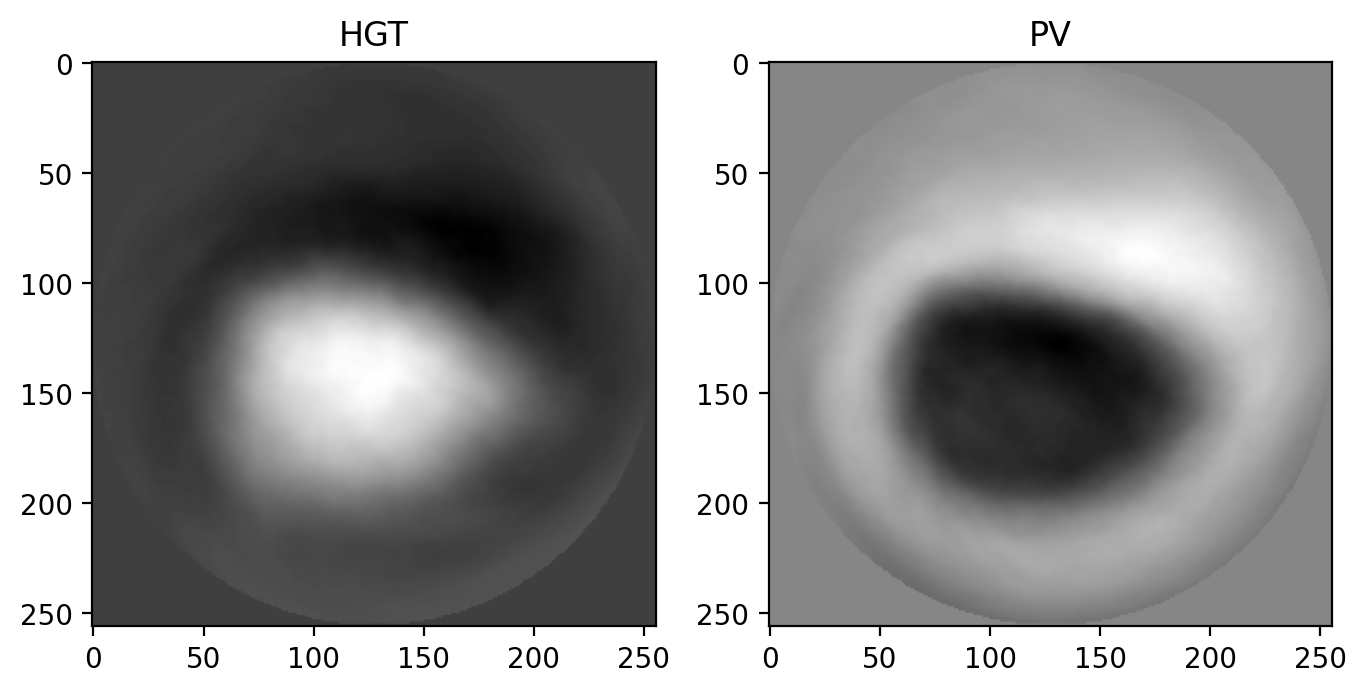

In [28]:
f = plt.figure(figsize=(8,4), dpi=200)
p = plt.subplot(1,2,1)
plt.imshow(hgt_subsample_mean, cmap='gray')
plt.title('HGT')
p = plt.subplot(1,2,2)
plt.imshow(pv_subsample_mean, cmap='gray')
plt.title('PV');

Text(0.5, 0, 'HGT')

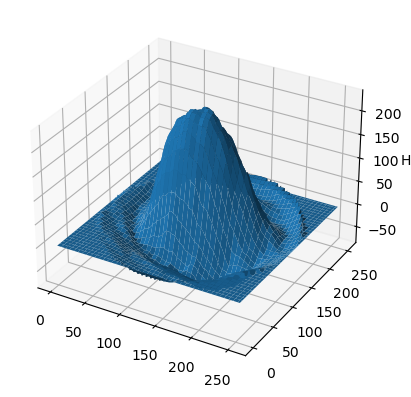

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, hgt_subsample_mean)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
ax.set_zlabel('HGT')

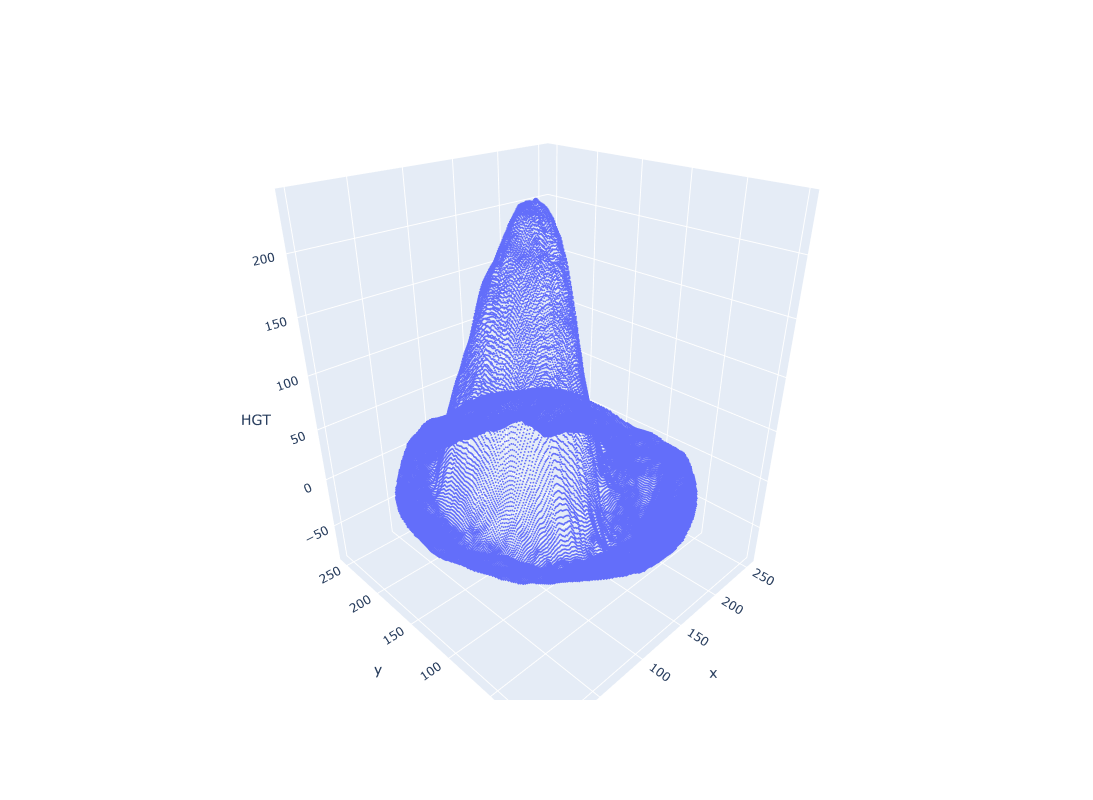

In [30]:
fig = go.Figure(data=[go.Scatter3d(x=xx[mask].ravel(),
                                   y=yy[mask].ravel(),
                                   z=hgt_subsample_mean[mask].ravel(),
                                   mode='markers',
                                   marker=dict(size=1))
                     ])
fig.update_layout(autosize=False,
                  width=800,
                  height=800,
                  margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad=4),
                  scene = dict(xaxis_title='x',
                               yaxis_title='y',
                               zaxis_title='HGT'))
fig.show()

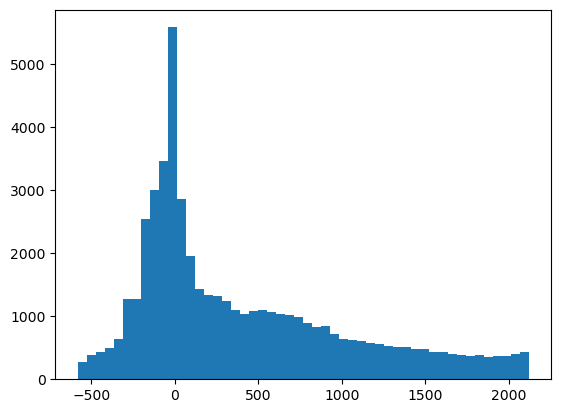

In [32]:
plt.hist(ch_hgt[mask].ravel(), bins=50);

In [33]:
hgt_subsample.shape

(5000, 256, 256)

In [34]:
masks = [mask[np.newaxis, :,:]]*hgt_subsample.shape[0]

In [35]:
masks = np.concatenate(masks, axis=0)

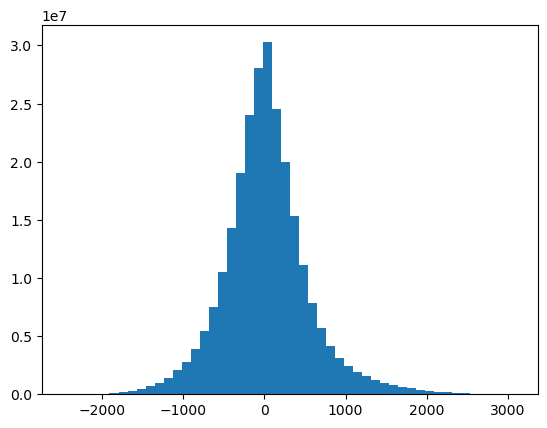

In [36]:
plt.hist(hgt_subsample[masks].ravel(), bins=50);

In [37]:
hgt_subsample[masks].ravel().mean(), hgt_subsample[masks].ravel().std()

(23.173006, 529.02545)